## Frameworks and Modules

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


First we import frameworks and modules

In [2]:
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import Image
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

%tensorflow_version 1.x
import tensorflow as tf
from keras.layers import Input, Conv2D, Activation, MaxPooling2D ,AveragePooling2D, Flatten, Dense
from keras.models import Model
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
get_ipython().magic(u'matplotlib inline')


TensorFlow 1.x selected.


Using TensorFlow backend.


## Dataset

Then we should create and organize **Train** and **Test** sets.


In [ ]:
!unzip '/content/drive/MyDrive/vision/Red_train.zip' 
!unzip '/content/drive/MyDrive/vision/Blue_train.zip' 
!unzip '/content/drive/MyDrive/vision/Referee_train.zip' 

In [ ]:
!unzip '/content/drive/MyDrive/vision/Red_test.zip' 
!unzip '/content/drive/MyDrive/vision/Blue_test.zip' 
!unzip '/content/drive/MyDrive/vision/Referee_test.zip' 

In [6]:
im_names_1 = glob.glob('/content/Red/*.jpg')

red = []
for i in im_names_1:
  I = cv2.imread(i)
  red.append(I)  
red = np.array(red)  
red_label = np.full(shape=(len(red),), fill_value=0, dtype='uint8')

im_names_2 = glob.glob('/content/Blue/*.jpg')

blue = []
for i in im_names_2:
  I = cv2.imread(i)
  blue.append(I)  
blue = np.array(blue)  
blue_label = np.full(shape=(len(blue),), fill_value=1, dtype='uint8')

im_names_3 = glob.glob('/content/Referee/*.jpg')

ref = []
for i in im_names_3:
  I = cv2.imread(i)
  ref.append(I)  
ref = np.array(ref)
ref_label = np.full(shape=(len(ref),), fill_value=2, dtype='uint8')

im_names_4 = glob.glob('/content/Red_test/*.jpg')

red2 = []
for i in im_names_4:
  I = cv2.imread(i)
  red2.append(I)  
red2 = np.array(red2) 
red2_label = np.full(shape=(len(red2),), fill_value=0, dtype='uint8')

im_names_5 = glob.glob('/content/Blue_test/*.jpg')

blue2 = []
for i in im_names_5:
  I = cv2.imread(i)
  blue2.append(I)  
blue2 = np.array(blue2) 
blue2_label = np.full(shape=(len(blue2),), fill_value=1, dtype='uint8')

im_names_6 = glob.glob('/content/Referee_test/*.jpg')

ref2 = []
for i in im_names_6:
  I = cv2.imread(i)
  ref2.append(I)  
ref2 = np.array(ref2) 
ref2_label = np.full(shape=(len(ref2),), fill_value=2, dtype='uint8')

train_image = np.concatenate((red, blue, ref),axis=0)
train_label = np.concatenate((red_label, blue_label, ref_label),axis=0)

test_image = np.concatenate((red2, blue2, ref2),axis=0)
test_label = np.concatenate((red2_label, blue2_label, ref2_label),axis=0)

train_image, train_label = shuffle(train_image, train_label, random_state=0)
test_image, test_label = shuffle(test_image, test_label, random_state=0)

train_label = to_categorical(train_label)
test_label = to_categorical(test_label)


In [7]:
train_image.shape

(4390, 45, 45, 3)

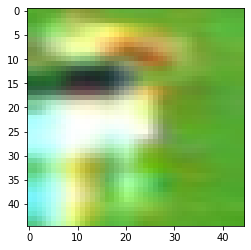

In [8]:
plt.imshow(train_image[1431,:,:,::-1]);

# Convolutional Neural Network





Now we create the Convolutional Neural Network


In [9]:
def build_model(input_shape):
  
  x_input = Input(shape =input_shape,name = 'input')

  x = Conv2D(filters = 6, kernel_size = 5, strides = 1, padding = 'valid', name = 'conv1')(x_input)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size =(2,2), strides = 2, name = 'pad1')(x)

  x = Conv2D(filters = 14, kernel_size = 3, strides = 1, padding = 'valid', name = 'conv2')(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size =(2,2), strides = 2, name = 'pad2')(x)

  x = Flatten()(x)

  x = Dense(units = 150, name = 'fc_1')(x)
  x = Activation('relu', name = 'relu_1')(x)
  # x = Dropout(rate = 0.5)

  x = Dense(units = 80, name = 'fc_2')(x)
  x = Activation('relu', name = 'relu_2')(x)
  # x = Dropout(rate = 0.5)

  outputs = Dense(units = 3, name = 'softmax', activation='softmax')(x)
  
  model = Model(inputs = x_input, outputs = outputs)
  model.summary()

  return model

In [10]:
model = build_model(input_shape=(45,45,3))
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy' ,metrics = ['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 45, 45, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 41, 41, 6)         456       
_________________________________________________________________
activation_1 (Activation)    (None, 41, 41, 6)         0         
_________________________________________________________________
pad1 (MaxPooling2D)          (None, 20, 20, 6)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 18, 18, 14)        770       
_________________________________________________________________
activation_2 (Activation)    (None, 18, 18, 14)        0         
___________________________________________

In [11]:
model.fit(x = train_image, y= train_label , epochs = 10, validation_data=(test_image, test_label))



Train on 4390 samples, validate on 821 samples
Epoch 1/10
4390/4390 [==============================] - 8s 2ms/step - loss: 2.4319 - accuracy: 0.9098 - val_loss: 0.1279 - val_accuracy: 0.9878
Epoch 2/10
4390/4390 [==============================] - 1s 145us/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 0.0967 - val_accuracy: 0.9915
Epoch 3/10
4390/4390 [==============================] - 1s 141us/step - loss: 0.0226 - accuracy: 0.9925 - val_loss: 0.0744 - val_accuracy: 0.9915
Epoch 4/10
4390/4390 [==============================] - 1s 144us/step - loss: 0.0132 - accuracy: 0.9952 - val_loss: 0.0673 - val_accuracy: 0.9903
Epoch 5/10
4390/4390 [==============================] - 1s 144us/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0952 - val_accuracy: 0.9951
Epoch 6/10
4390/4390 [==============================] - 1s 146us/step - loss: 4.7471e-04 - accuracy: 1.0000 - val_loss: 0.1074 - val_accuracy: 0.9951
Epoch 7/10
4390/4390 [==============================] - 1s 145us/step - lo

In [14]:
batch = np.expand_dims(test_image[431], axis=0)
prediction = model.predict(batch)
print(prediction)
np.argmax(prediction[0])

[[3.4400833e-05 1.0144016e-12 9.9996555e-01]]


2

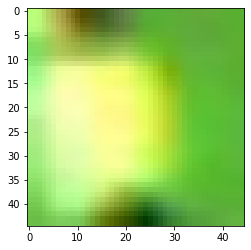

In [15]:
plt.imshow(test_image[431,:,:,::-1]);

In [16]:
# create videocapture
cap = cv2.VideoCapture('output.mp4')

# create Background Subtractor objects
backSub = cv2.createBackgroundSubtractorKNN()

# Read Map Image
fmap = cv2.imread('2D_field.png')
fmap = cv2.resize(fmap,(1050,680))

# 9 correspondences for perspective transform
points1 = np.array([(144,166),
                    (1136,116),
                    (873,780),
                    (639,110),
                    (673,200),
                    (490,210),
                    (857,192),
                    (660,162),
                    (692,251)], dtype=np.int32)

points2 = np.array([(164,147),
                    (886,147),
                    (525,676),
                    (525,4),
                    (525,340),
                    (430,340),
                    (618,340),
                    (525,250),
                    (525,430)],   dtype=np.int32)   

# find perspective transform
H, _ = cv2.findHomography(points1, points2, cv2.RANSAC,5.0)

hh=0
while True:
  hh+=1
  # read video frame by frame
  ret, frame = cap.read()
    
  if ret == False:
      break
  
  # apply GaussianBlur 
  m = 5
  frame2 = cv2.GaussianBlur(frame,(m,m),0)
  #cv2.line(frame2,(0,120),(1280,57),color=(0,0,0),thickness=40)

  # update the background model (get foreground mask)
  fgMask = backSub.apply(frame2)
    
    
        
  # threshold for removing shadows
  ret, fgMask = cv2.threshold(fgMask,128,255,cv2.THRESH_BINARY)

  # opening
  kernel = np.array([[0,0,0,1,1,0,0,0],
                      [0,0,0,1,1,0,0,0],
                      [0,1,1,1,1,1,1,0],
                      [0,1,1,1,1,1,1,0],
                      [0,1,1,1,1,1,1,0],
                      [0,1,1,1,1,1,1,0],
                      [0,0,1,1,1,1,0,0],
                      [0,0,1,1,1,1,0,0],
                      [0,0,1,1,1,1,0,0]], dtype='uint8')
  
  fgMask = cv2.morphologyEx(fgMask, cv2.MORPH_OPEN, kernel)
      
      
  #closing
  kernel = np.array([ [0,0,0,1,1,0,0,0],
                      [0,0,0,1,1,0,0,0],
                      [0,1,1,1,1,1,1,0],
                      [0,1,1,1,1,1,1,0],
                      [0,1,1,1,1,1,1,0],
                      [0,1,1,1,1,1,1,0],
                      [0,1,1,1,1,1,1,0],
                      [0,1,1,1,1,1,1,0],
                      [0,0,1,1,1,1,0,0],
                      [0,0,1,1,1,1,0,0],
                      [0,0,1,1,1,1,0,0]], dtype='uint8')
  
  fgMask = cv2.morphologyEx(fgMask, cv2.MORPH_CLOSE, kernel)
      
  n,C,stats, centroids = cv2.connectedComponentsWithStats(fgMask);
  
  f = fmap.copy()
  
  if hh==31:     
    for i in range(1,n):
    
      if stats[i,cv2.CC_STAT_TOP]<=240:
        if stats[i,cv2.CC_STAT_AREA]>20:
          point = centroids[i].reshape(-1,1,2).astype(np.float32)
          dst2 = cv2.perspectiveTransform(point,H).reshape(1,2)
          dst2 = dst2.astype('int32')
          
          box = frame[stats[i,1]:stats[i,1]+stats[i,3],stats[i,0]:stats[i,0]+stats[i,2]]
          box = cv2.resize(box,(45,45))
          batch = np.expand_dims(box, axis=0)
          pred = model.predict(batch)
          color = np.argmax(pred[0])
          
          if color == 0:
            cv2.circle(f,(dst2[0,0], dst2[0,1]), radius=7, color=[0,0,255], thickness=-1)

          if color == 1:
            cv2.circle(f,(dst2[0,0], dst2[0,1]), radius=7, color=[255,0,0], thickness=-1)

          if color == 2:
            cv2.circle(f,(dst2[0,0], dst2[0,1]), radius=7, color=[0,255,255], thickness=-1)  

                    
      elif 240<stats[i,cv2.CC_STAT_TOP]<=480:
        if stats[i,cv2.CC_STAT_AREA]>400:
          point = centroids[i].reshape(-1,1,2).astype(np.float32)
          dst2 = cv2.perspectiveTransform(point,H).reshape(1,2)
          dst2 = dst2.astype('int32')
          
          box = frame[stats[i,1]:stats[i,1]+stats[i,3],stats[i,0]:stats[i,0]+stats[i,2]]
          box = cv2.resize(box,(45,45))
          batch = np.expand_dims(box, axis=0)
          pred = model.predict(batch)
          color = np.argmax(pred[0])
          
          if color == 0:
            cv2.circle(f,(dst2[0,0], dst2[0,1]), radius=7, color=[0,0,255], thickness=-1)

          if color == 1:
            cv2.circle(f,(dst2[0,0], dst2[0,1]), radius=7, color=[255,0,0], thickness=-1)

          if color == 2:
            cv2.circle(f,(dst2[0,0], dst2[0,1]), radius=7, color=[0,255,255], thickness=-1)             
                    
      elif 480<stats[i,cv2.CC_STAT_TOP]:
        if stats[i,cv2.CC_STAT_AREA]>1600:
          point = centroids[i].reshape(-1,1,2).astype(np.float32)
          dst2 = cv2.perspectiveTransform(point,H).reshape(1,2)
          dst2 = dst2.astype('int32')
          
          box = frame[stats[i,1]:stats[i,1]+stats[i,3],stats[i,0]:stats[i,0]+stats[i,2]]
          box = cv2.resize(box,(45,45))
          batch = np.expand_dims(box, axis=0)
          pred = model.predict(batch)
          color = np.argmax(pred[0])
          
          if color == 0:
            cv2.circle(f,(dst2[0,0], dst2[0,1]), radius=7, color=[0,0,255], thickness=-1)

          if color == 1:
            cv2.circle(f,(dst2[0,0], dst2[0,1]), radius=7, color=[255,0,0], thickness=-1)

          if color == 2:
            cv2.circle(f,(dst2[0,0], dst2[0,1]), radius=7, color=[0,255,255], thickness=-1)             
    
      #show the current frame ,the fg masks and Map
      cv2_imshow(frame)
      cv2_imshow(fgMask)
      

      if cv2.waitKey(1) == ord('q'):
        break
    
      cap.release()
      cv2.destroyAllWindows()    


error: ignored